In [22]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict, Annotated, Literal
from pydantic import BaseModel, Field
import operator

In [23]:
class QuadState(TypedDict):
    a : int
    b : int
    c : int
    equation : str
    discriminant : float
    result : str
    

In [24]:
def quadratic_equation(state: QuadState):
    equation = f"Quadratic equation: {state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    state['equation'] = equation
    return {"equation": equation}

In [25]:
def calculate_discriminant(state : QuadState):
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = b**2 - 4*a*c
    state['discriminant'] = discriminant
    return {"discriminant": discriminant}

In [26]:
def real_roots(state: QuadState):
    a = state['a']
    b = state['b']
    c = state['c']
    d = state['discriminant']
    root1 = (-b + d**0.5) / (2*a)
    root2 = (-b - d**0.5) / (2*a)
    result = f"The roots are real and different. Root1: {root1}, Root2: {root2}"
    state['result'] = result
    return {"result": result}

In [27]:
def repeated_roots(state: QuadState):
    a = state['a']
    b = state['b']
    root = -b / (2*a)
    result = f"The roots are real and same. Root: {root}"
    state['result'] = result
    return {"result": result}

In [28]:
def no_real_roots(state: QuadState):
    result = "The roots are complex and different."
    state['result'] = result
    return {"result": result}

In [29]:
def check_condition(state : QuadState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:    
    d = state["discriminant"]
    if d > 0 :
        return "real_roots"
    elif d == 0 :
        return "repeated_roots" 
    else :
        return "no_real_roots"

In [30]:
graph = StateGraph(QuadState)

graph.add_node("quadatic_equation", quadratic_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)
graph.add_node("no_real_roots", no_real_roots)

graph.add_edge(START, "quadatic_equation")
graph.add_edge("quadatic_equation", "calculate_discriminant") 
graph.add_conditional_edges("calculate_discriminant", check_condition) 
graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)  
graph.add_edge("no_real_roots", END) 

workflow = graph.compile()

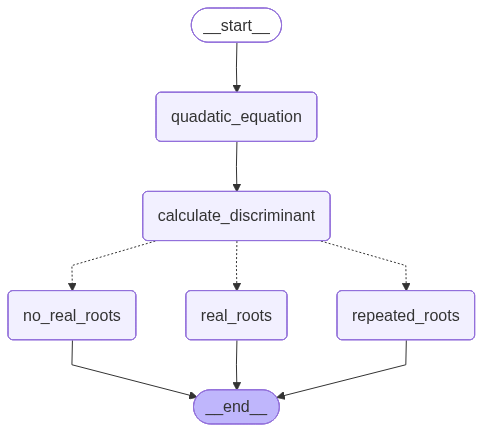

In [31]:
workflow

In [33]:
initial_state = {
    "a" : 1,
    "b" : 2,
    "c" : 1
}

workflow.invoke(initial_state)

{'a': 1,
 'b': 2,
 'c': 1,
 'equation': 'Quadratic equation: 1x^2 + 2x + 1 = 0',
 'discriminant': 0,
 'result': 'The roots are real and same. Root: -1.0'}